## 3er parcial práctico, Anette Hernández Monárrez

In [40]:
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

## Leyendo paths y preprocesando imagenes

In [33]:
img_height = 180
img_width = 180
batch_size = 16

base_path = r'C:\\Users\\gia19\\OneDrive\\Documentos\\GitHub\\Neurociencias-2025-2\\Trabajillo\\Brain Tumor'
csv_path = r'C:\\Users\\gia19\\OneDrive\\Documentos\\GitHub\\Neurociencias-2025-2\\Trabajillo\\Brain Tumor.csv'

df = pd.read_csv(csv_path)

df['filepath'] = df['Image'].apply(lambda x: os.path.join(base_path, x + '.jpg'))

df = df[df['filepath'].apply(os.path.exists)]

filepaths = df['filepath'].values
labels = df['Class'].values

X_train, X_val, y_train, y_val = train_test_split(filepaths, labels, test_size=0.2, random_state=123, stratify=labels)

def process_images(filepaths, labels):
    images = []
    for path in filepaths:
        img = load_img(path, target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0
        images.append(img)
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

X_train_tensor, y_train_tensor = process_images(X_train, y_train)
X_val_tensor, y_val_tensor = process_images(X_val, y_val)

train_ds = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor)).batch(batch_size)
     

## Aplicar CNN al dataset BrainTumor y obtejer el accuracy

C:\Users\gia19\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 306ms/step - accuracy: 0.7633 - loss: 0.4826 - val_accuracy: 0.7689 - val_loss: 0.5109
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 271ms/step - accuracy: 0.8702 - loss: 0.3162 - val_accuracy: 0.8738 - val_loss: 0.3167
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 264ms/step - accuracy: 0.9007 - loss: 0.2376 - val_accuracy: 0.9137 - val_loss: 0.2338
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 56s 296ms/step - accuracy: 0.9347 - loss: 0.1712 - val_accuracy: 0.9203 - val_loss: 0.2256
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 53s 281ms/step - accuracy: 0.9375 - loss: 0.1559 - val_accuracy: 0.9004 - val_loss: 0.2433
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 54s 284ms/step - accuracy: 0.9600 - loss: 0.1015 - val_accuracy: 0.9190 - val_loss: 0.2535
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - accuracy: 0.9763 - loss: 0.0585 - val_accuracy: 0.9203 - val_loss: 0.2363
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 56s 294ms/step - accuracy: 0.9829 - loss: 0

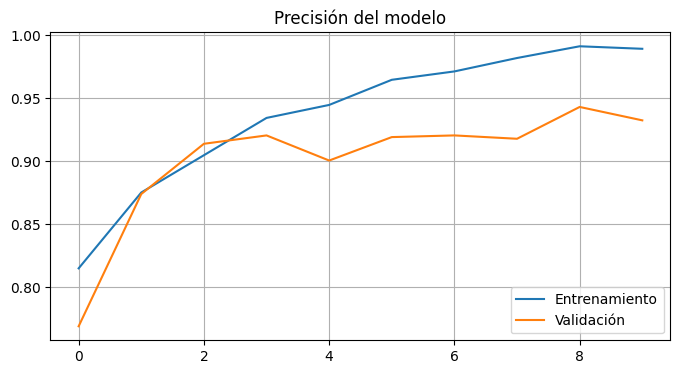

Accuracy final en validación: 93.23%


In [35]:
num_classes = 2

model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión del modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"Accuracy final en validación: {history.history['val_accuracy'][-1] * 100:.2f}%")

## Mejorando el accuracy con número de capas, de neuronas y función de activación
### Se espera que el modelo sea mas estable, que tenga mas convoluciones y que no tenga tanto sobreajuste

C:\Users\gia19\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.6066 - loss: 0.6462 - val_accuracy: 0.7809 - val_loss: 0.4897
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.8128 - loss: 0.4459 - val_accuracy: 0.8459 - val_loss: 0.3690
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8447 - loss: 0.3520 - val_accuracy: 0.8406 - val_loss: 0.3698
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 943ms/step - accuracy: 0.8741 - loss: 0.3146 - val_accuracy: 0.8672 - val_loss: 0.3451
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 173s 917ms/step - accuracy: 0.8836 - loss: 0.2933 - val_accuracy: 0.8752 - val_loss: 0.3226
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 168s 887ms/step - accuracy: 0.8885 - loss: 0.2726 - val_accuracy: 0.8645 - val_loss: 0.3484
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 160s 847ms/step - accuracy: 0.8866 - loss: 0.2618 - val_accuracy: 0.8898 - val_loss: 0.2779
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 157s 830ms/step - accuracy: 0.9019 - loss: 0.

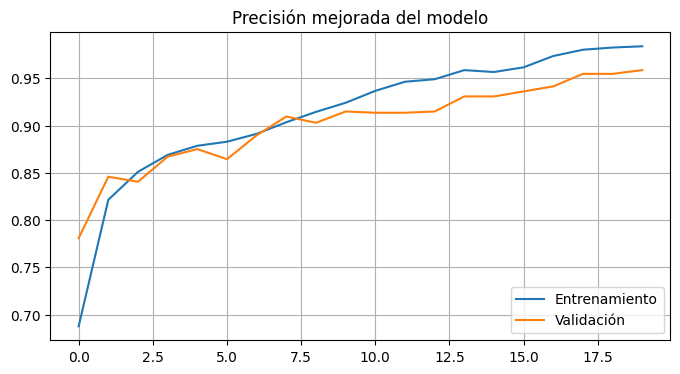

In [38]:
num_classes = 2

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

loss, accuracy = model.evaluate(val_ds)
print(f"\nAccuracy final del modelo en validación: {accuracy * 100:.2f}%")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión mejorada del modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Comparando los resultados 

In [44]:
df['filepath'] = df['Image'].apply(lambda x: os.path.join(base_path, x + '.jpg'))
df = df[df['filepath'].apply(os.path.exists)]

X = []
y = []

for _, row in df.iterrows():
    img = load_img(row['filepath'], target_size=(64, 64))
    img_array = img_to_array(img).flatten()
    X.append(img_array)
    y.append(row['Class'])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy SVM: {svm_acc*100:.2f}%")

# Regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)
print(f"Accuracy Regresión logística: {log_acc*100:.2f}%")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy Random Forest: {rf_acc*100:.2f}%")

Accuracy SVM: 90.84%
Accuracy Regresión logística: 84.06%
Accuracy Random Forest: 94.16%
